## Notebook Objectives

Summarize the Necessary Knowleadge to Apply Clustering Models in Businesses


### About the Models

&emsp;&emsp;_How It Works_    
&emsp;&emsp;_When to Use it_    
&emsp;&emsp;_Advantages_    
&emsp;&emsp;_Disadvantages_    
&emsp;&emsp;_Statistical Assumptions_    
&emsp;&emsp;_Parameters_    
&emsp;&emsp;_More Explanations_

[K-Means](#K-Means)<br>
[DBSCAN](#DBSCAN)<br>
[AgglomerativeClustering](#AgglomerativeClustering)<br>

### Agenda

[Business Questions](#Business-Questions)<br>

[Imports](#Imports)<br>
&emsp;[Functions](#Functions)<br>
&emsp;[Settings](#Settings)<br>

[Loading Data](#Loading-Data)<br>

[Feature Engineering](#Feature-Engineering)<br>

[Preprocessing](#Preprocessing)<br>
&emsp;[Handling Missing Values](#Handling-Missing-Values)<br>
&emsp;[Encoding Categorical Variables](#Encoding-Categorical-Variables)<br>
&emsp;[Scaling/Normalizing Features](#Scaling/Normalizing-Features)<br>
&emsp;[Handling Outliers](#Handling-Outliers)<br>

[Feature Selection](#Feature-Selection)<br>

[Models](#Models)<br>
&emsp;[Choosing The Right Clustering Algorithm](#Choosing-The-Right-Clustering-Algorithm)<br>
&emsp;[K-Means](#K-Means)<br>
&emsp;[DBSCAN](#DBSCAN)<br>
&emsp;[AgglomerativeClustering](#AgglomerativeClustering)<br>

[Evaluation Metrics](#Evaluation-Metrics)<br>
&emsp;[Choosing the Right Metric](#Choosing-the-Right-Metric)<br>

[Feature Importances](#Feature-Importances)<br>

[Cluster Analysis](#Cluster-Analysis)<br>
&emsp;[Cluster Profiles](#Cluster-Profiles)<br>


## Business Questions

## Imports

In [18]:
import pandas as pd


from sklearn.preprocessing import MinMaxScaler


### Functions

### Settings

In [2]:
pd.set_option("display.max_columns", None)

### Loading Data

In [3]:
# https://www.kaggle.com/datasets/jr2ngb/superstore-data
df_superstore = pd.read_csv("../data/superstore_dataset2011-2015.csv", encoding = "ISO-8859-1")
print(df_superstore.shape)
df_superstore.head(2)

(51290, 24)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


## Feature Engineering

In [8]:
df_customer_abt = (
    df_superstore
        .groupby('Customer ID')
        .agg(
            total_sales=('Sales', 'sum'),
            avg_ticket=('Sales', 'mean'),
            total_products=('Quantity', 'sum'),
            avg_produtcs_per_purchase=('Quantity', 'mean'),
            median_discount=('Discount', 'median'),
            avg_discount=('Discount', 'mean'),
            std_discount=('Discount', 'std'),
            total_profit=('Profit', 'sum'),
            avg_profit=('Profit', 'mean'),
            total_shipping_cost=('Shipping Cost', 'sum'),
            avg_shipping_cost=('Shipping Cost', 'mean'),
        ).reset_index()
)
print(df_customer_abt.shape)
df_customer_abt.head(2)

(1590, 12)


,Customer ID,total_sales,avg_ticket,total_products,avg_produtcs_per_purchase,median_discount,avg_discount,std_discount,total_profit,avg_profit,total_shipping_cost,avg_shipping_cost
0,AA-10315,13747.413,327.319357,145,3.452381,0.0,0.103571,0.159034,447.6905,10.659298,1236.15,29.432143
1,AA-10375,5884.195,140.099881,139,3.309524,0.0,0.166667,0.218271,677.4774,16.130414,903.92,21.521905


## Preprocessing

### Handling Missing Values

In [9]:
df_customer_abt = df_customer_abt.dropna()
df_customer_abt.shape

(1583, 12)

### Encoding Categorical Variables

### Handling Outliers

## Feature Selection

In [14]:
features = (
    df_customer_abt.select_dtypes('number')
                    # .drop(columns=['Customer ID'])
                    .columns
                    .to_list()
)

# features = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

df_customer_abt[features].head(2)

,total_sales,avg_ticket,total_products,avg_produtcs_per_purchase,median_discount,avg_discount,std_discount,total_profit,avg_profit,total_shipping_cost,avg_shipping_cost
0,13747.413,327.319357,145,3.452381,0.0,0.103571,0.159034,447.6905,10.659298,1236.15,29.432143
1,5884.195,140.099881,139,3.309524,0.0,0.166667,0.218271,677.4774,16.130414,903.92,21.521905


### Scaling/Normalizing Features

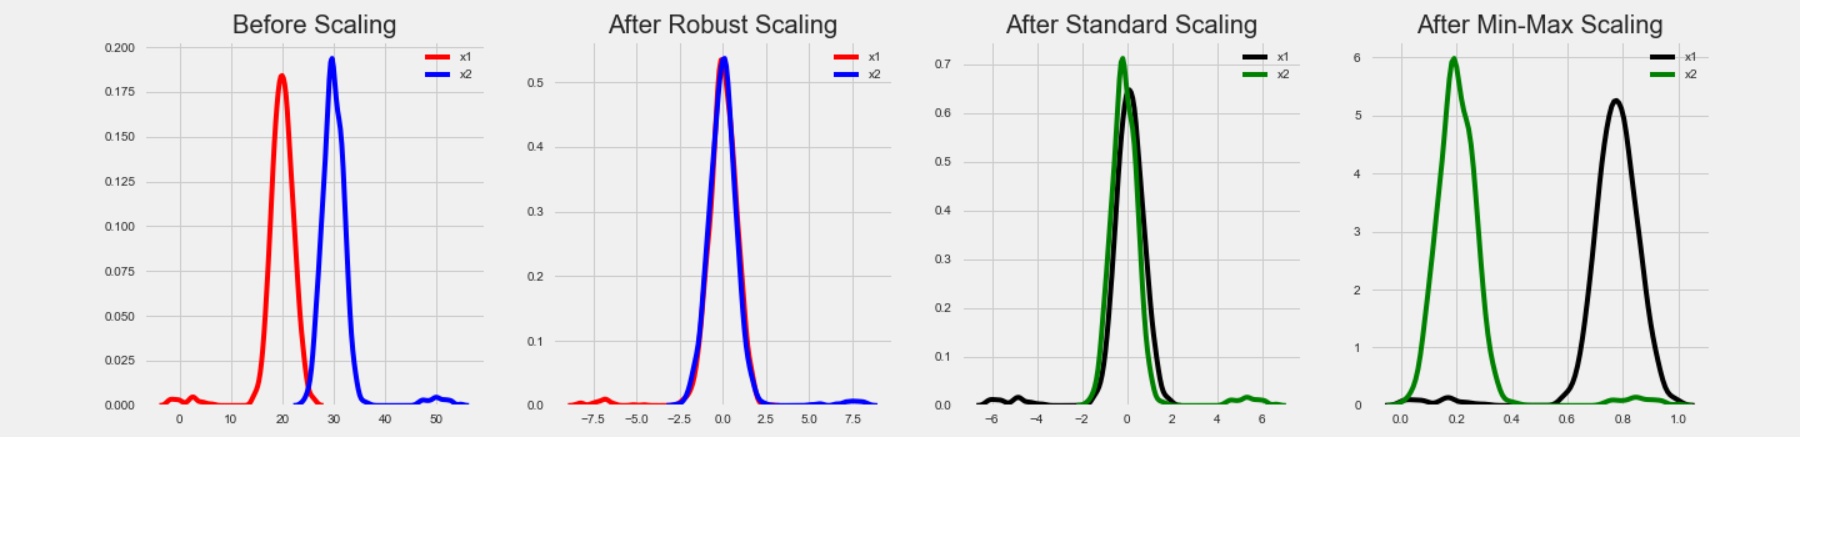

In [19]:
scaler = MinMaxScaler()
df_customer_abt_scaled = scaler.fit_transform(df_customer_abt[features])

## Models

### Choosing The Right Clustering Algorithm

### K-Means


**How It Works:** StatQuest: K-means clustering (https://www.youtube.com/watch?v=4b5d3muPQmA&t)



- **When to Use it:**

    Useful in scenarios where you expect clusters to have somewhat spherical shape (convex data) and roughly equal sizes.    

    When Data Points naturally form distinct, well-separated spherical clusters.    


- **Advantages**

    Easy to Interpret: K-means provides clear cluster centers, making it easier to interpret clusters and use them for subsequent tasks like classification or segmentation.    

    Scalability (It's Fast): ideal for large datasets due to its computational efficiency.    


- **Disadvantages**


    Assumption of Spherical Clusters: it performs poorly with (non-convex data) elongated or irregularly shaped clusters.    
    
    Sensitivity to Outliers: because it uses the "mean" to readjust clusters, centroids can be dragged by outliers, distorting the centroids.       

    Sensitive to Initialization: results depend heavily on the initial positions of centroids.   

    Cluster Size Imbalance: it tends to split larger clusters and merge smaller ones, failing to properly represent data with clusters of unequal sizes. Ex: a dataset with one large group of 10,000 points and a smaller group of 100 points. K-means might allocate multiple centroids to the larger group while merging the smaller group into another cluster, and that's because we set the quantity of clusters beforehand.

    Lacks Consistency: it gives varying results on different runs of an algorithm.   



- **Statistical Assumptions**

1. Clusters are Spherical:
    
    "Mean" as a Good Cluster Representation: K-means relies on centroids, meaning it works best when the mean is a meaningful representation of the cluster. Ex: when data is symmetrically distributed (equal mean, median and mode, making the centroid (mean) a good representative).    

    Distance Metric Dependence: K-means typically uses Euclidean distance, so it assumes data features are equally scaled. Proper normalization (e.g., standardization) is essential.    




- **Parameters**



- **More Explanations**




### DBSCAN

### AgglomerativeClustering

## Evaluation Metrics

### Choosing the Right Metric

## Feature Importances

## Cluster Analysis

### Cluster Profiles